In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2025-02-17 14:42:19.809709: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 14:42:19.814226: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 14:42:19.875002: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-17 14:42:19.937971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739782639.988319     516 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739782640.00

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

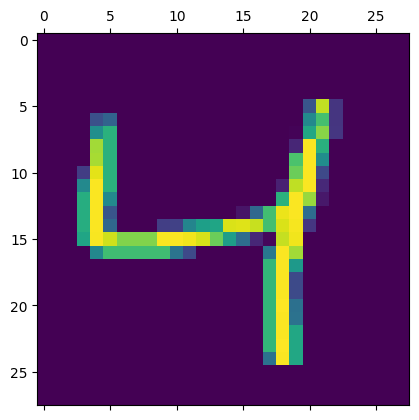

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

np.uint8(4)

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattend.shape

(60000, 784)

In [15]:
X_test_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])



model.fit(X_train_flattend,y_train,epochs = 5)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-17 14:42:25.725881: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8092 - loss: 0.7312
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9138 - loss: 0.3111
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9239 - loss: 0.2704
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9269 - loss: 0.2676


In [18]:
model.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9160 - loss: 0.3069


[0.2706230580806732, 0.9261999726295471]

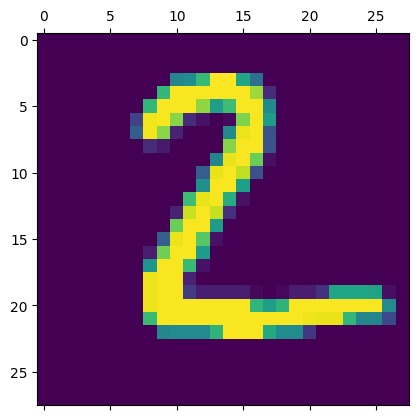

In [19]:
plt.matshow(X_test[1])

In [20]:
y_pred =model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [21]:
y_pred[1]

array([3.6650389e-01, 5.0998060e-03, 9.9915105e-01, 1.8165353e-01,
       7.0638428e-10, 8.1615651e-01, 8.5500264e-01, 5.4012751e-13,
       1.2636466e-01, 1.1065099e-09], dtype=float32)

In [22]:
np.argmax(y_pred[1])

np.int64(2)

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [24]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,    9,    2,    4,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,   10,  924,   12,   11,    4,   13,    9,   43,    3],
       [   4,    1,   24,  905,    1,   32,    2,    8,   26,    7],
       [   1,    1,    2,    1,  925,    0,   13,    3,   10,   26],
       [  10,    3,    2,   21,   12,  781,   18,    5,   34,    6],
       [   8,    3,    5,    1,    7,   10,  920,    2,    2,    0],
       [   1,    7,   23,    7,   10,    1,    0,  936,    5,   38],
       [   4,    7,    7,   15,    9,   21,   10,    5,  890,    6],
       [   9,    8,    1,   10,   36,    8,    0,   11,   12,  914]],
      dtype=int32)>

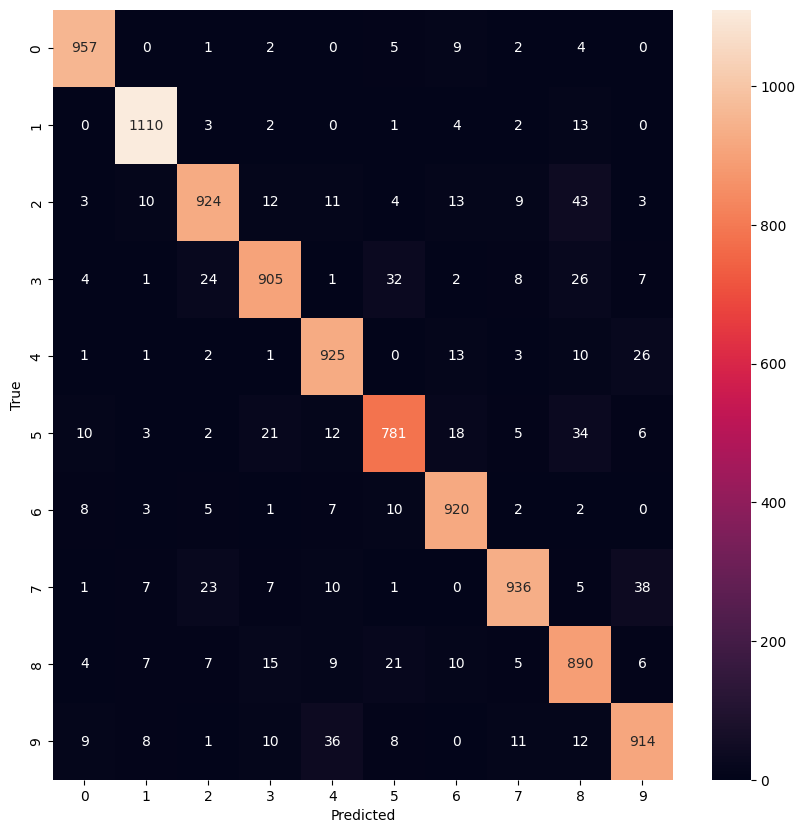

In [25]:
import seaborn as  sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='AdamW',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8689 - loss: 0.4426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9662 - loss: 0.1115
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0765
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0556
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0426


In [31]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9727 - loss: 0.0973


[0.08460358530282974, 0.9758999943733215]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


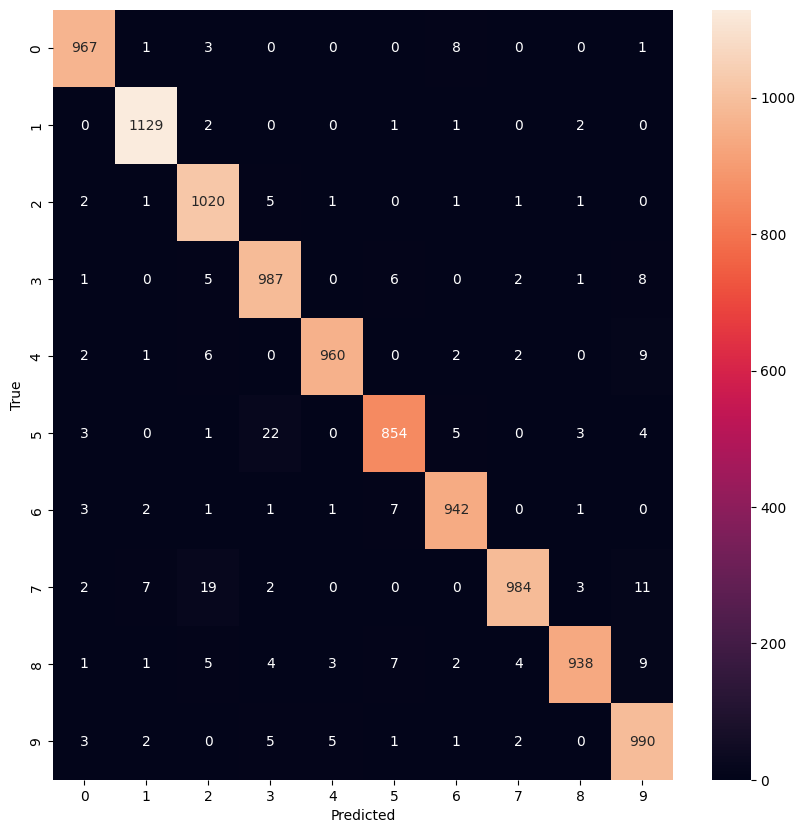

In [28]:
y_pred =model.predict(X_test_flattend)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()